In [12]:
import pickle

# Pfad zur gespeicherten .pkl-Datei
filename = "data/pickle/processed_documents.pkl"

# Laden der Liste aus der .pkl-Datei
with open(filename, "rb") as file:
    processed_documents = pickle.load(file)

# Ausgabe der ersten Einträge, um zu überprüfen, dass das Laden erfolgreich war
for i, doc in enumerate(processed_documents):
    print(f"Document {i}:\n")
    for token_info in doc:
        print(token_info)
    print("\n" + "="*50 + "\n")

# Optional: Begrenze die Ausgabe auf die ersten 5 Dokumente, wenn es viele sind
    if i >= 4:
        break

Document 0:

('blaue', 'ADJ', 'blau')
('altglascontainer', 'NOUN', 'Altglascontainer')
('saubere', 'ADJ', 'sauber')
('flaschen', 'NOUN', 'Flasche')
('deckelgläser', 'NOUN', 'Deckelglas')
('farben', 'NOUN', 'Farbe')
('weiß', 'ADJ', 'weiß')
('getrennt', 'VERB', 'trennen')
('blaues', 'ADJ', 'blau')
('buntes', 'ADJ', 'bunt')
('glas', 'NOUN', 'Glas')
('bitte', 'ADJ', 'bitte')
('grünglas', 'NOUN', 'Grünglas')
('geben', 'VERB', 'geben')
('aschen', 'NOUN', 'Aschen')
('konservengläser', 'NOUN', 'Konservenglas')
('scheiben', 'NOUN', 'Scheiben')
('trinkgläser', 'NOUN', 'Trinkgläser')
('blumenvasen', 'NOUN', 'blumenvasen')
('restmüll', 'ADJ', 'Restmüll')
('keramik', 'NOUN', 'Keramik')
('glühbirnen', 'NOUN', 'Glühbirne')
('restmüll', 'NOUN', 'Restmüll')
('energiesparlampen', 'NOUN', 'Energiesparlampe')
('wertstoffhöfe', 'NOUN', 'Wertstoffhof')
('verschmutzte', 'ADJ', 'verschmutzt')
('gläser', 'ADJ', 'Gläser')
('restmüll', 'ADJ', 'Restmüll')
('standort', 'NOUN', 'Standort')
('öffentlichen', 'ADJ', '

In [9]:
from sentence_transformers import SentenceTransformer

def create_hybrid_embeddings(processed_documents, model_name='sentence-transformers/multi-qa-mpnet-base-dot-v1'):
    # Lade das vortrainierte Modell
    model = SentenceTransformer(model_name)
    
    # Listen für Embeddings und Metadaten
    embeddings = []
    metadatas = []
    
    # Durchlaufe jedes Dokument und erstelle Embeddings und Metadaten
    for doc in processed_documents:
        # Konvertiere das Dokument in einen zusammenhängenden Text
        text = ' '.join([token_info[2] for token_info in doc])  # Nutze die Lemmata
        
        # Erstelle das Embedding für den Text
        embedding = model.encode(text)
        embeddings.append(embedding)
        
        # Extrahiere relevante Metadaten
        keywords = extract_keywords(doc)  # Du kannst eine Funktion erstellen, die Schlüsselwörter extrahiert
        metadatas.append({
            'text': text,
            'keywords': keywords,
            # Weitere Metadaten wie Kategorien oder Tags hinzufügen
        })
    
    print(f"Erstellte {len(embeddings)} Embeddings und Metadaten.")
    return embeddings, metadatas

def extract_keywords(doc):
    # Beispielhafte erweiterte Funktion zur Extraktion von Schlüsselwörtern
    keywords = set()
    relevant_terms = {'papier', 'glas', 'biomüll', 'restmüll', 'verpackung', 'altglascontainer', 'wertstoffhof'}
    
    for token_info in doc:
        lemma = token_info[2].lower()
        if lemma in relevant_terms:
            keywords.add(lemma)
    
    return list(keywords)

# Beispielnutzung:
embeddings, metadatas = create_hybrid_embeddings(processed_documents)

# Anzahl der Einträge, die Du anzeigen möchtest
num_examples = 5

# Ausgabe der ersten paar Embeddings und ihrer zugehörigen Metadaten
for i in range(num_examples):
    print(f"Document {i}:\n")
    print(f"Embedding: {embeddings[i][:10]}...")  # Zeigt nur die ersten 10 Werte des Embeddings
    print(f"Metadaten: {metadatas[i]}")
    print("\n" + "="*50 + "\n")

/Users/jan/Documents/GitHub/predictiv_chatbot/predictiv_chatbot/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Erstellte 6 Embeddings und Metadaten.
Document 0:

Embedding: [-0.04092879 -0.3219404  -0.19728476  0.25314048 -0.04060019 -0.37531057
  0.20272696  0.26864415  0.09414177  0.10806803]...
Metadaten: {'text': 'blau Altglascontainer sauber Flasche Deckelglas Farbe weiß trennen blau bunt Glas bitte Grünglas geben Aschen Konservenglas Scheiben Trinkgläser blumenvasen Restmüll Keramik Glühbirne Restmüll Energiesparlampe Wertstoffhof verschmutzt Gläser Restmüll Standort öffentlich Sperrmüll plätzen Frankfurter trenn Service Gmbh Ecke töngesgasse schärfengässch Rgungsfachbetrie Rtschaft Eddn trenn Haus gehören Abfallbehälter Tonne Inhalt Produkt weiterverarbeiten grau Restmülltonn gelb Tonne verpackungen grün Tonne Papier Pappe braun Tonne bioabfäll grau Tonne restlich Abfall folgend entsorgungsangebot wertstoffe sichern altglascontain Flasche Deckelglas nd öffentlich Plätz altkleid Container Altkleider schuh nd Stadtteil öffentlich Plätz schadstoff abfäll gefährlich Stoff farb Spraydos Mitte

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


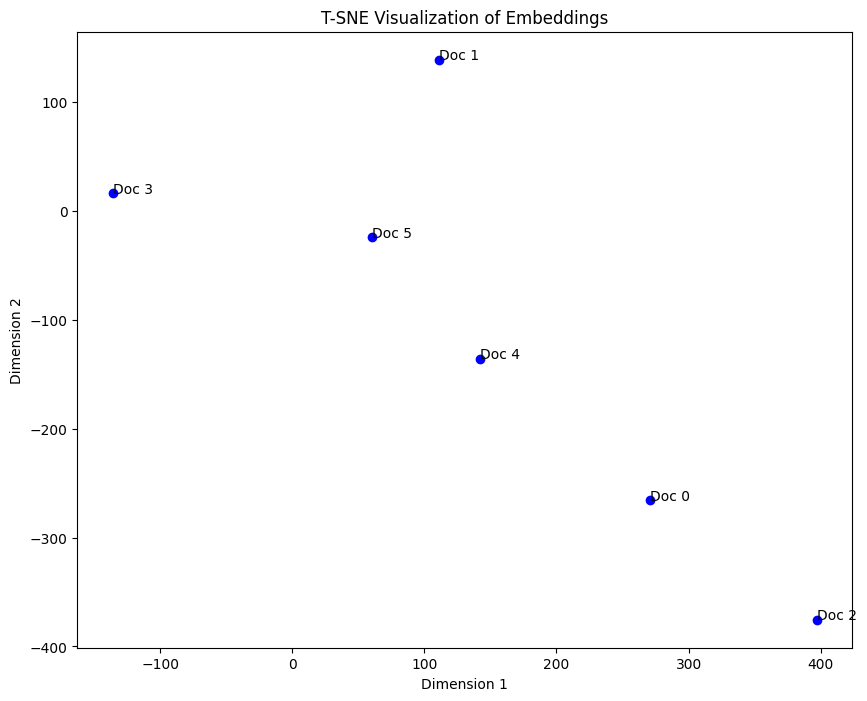

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, labels=None):
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Setze die Perplexity auf einen Wert kleiner als die Anzahl der Dokumente
    tsne = TSNE(n_components=2, random_state=42, perplexity=2)
    reduced_embeddings = tsne.fit_transform(embeddings_array)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Documents')
    
    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    
    plt.title("T-SNE Visualization of Embeddings")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Beispielnutzung:
labels = [f"Doc {i}" for i in range(len(embeddings))]
visualize_embeddings(embeddings, labels=labels)